In [26]:
#Dependencies:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import operator

In [27]:
# Load in file
olympic_data = "olympic_data.csv"

In [28]:
# Read and display the CSV with Pandas
olympic_data_df = pd.read_csv(olympic_data)
olympic_data_df.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Stockholm,1912,G,Hannes KOLEHMAINEN,FIN,31:20.8
1,M,10000M Men,Stockholm,1912,S,Lewis TEWANIMA,USA,32:06.6
2,M,10000M Men,Stockholm,1912,B,Albin STENROOS,FIN,32:21.8
3,M,10000M Men,Antwerp,1920,G,Paavo NURMI,FIN,31:45.8
4,M,10000M Men,Antwerp,1920,S,Joseph GUILLEMOT,FRA,31:47.2


In [29]:
# Create individual dataframes for each events
m_highjump_df = olympic_data_df.loc[olympic_data_df["Event"] == "High Jump Men"]
w_highjump_df = olympic_data_df.loc[olympic_data_df["Event"] == "High Jump Women"]
m_discus_df = olympic_data_df.loc[olympic_data_df["Event"] == "Discus Throw Men"]
w_discus_df = olympic_data_df.loc[olympic_data_df["Event"] == "Discus Throw Women"]
m_100_df = olympic_data_df.loc[olympic_data_df["Event"] == "100M Men"]
w_100_df = olympic_data_df.loc[olympic_data_df["Event"] == "100M Women"]
m_10000_df = olympic_data_df.loc[olympic_data_df["Event"] == "10000M Men"]
w_10000_df = olympic_data_df.loc[olympic_data_df["Event"] == "10000M Women"]
m_800_df = olympic_data_df.loc[olympic_data_df["Event"] == "800M Men"]
w_800_df = olympic_data_df.loc[olympic_data_df["Event"] == "800M Women"]


<ipython-input-40-7ef74342383a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_highjump_df["Result"] = m_highjump_df["Result"].map(lambda x:float(x))


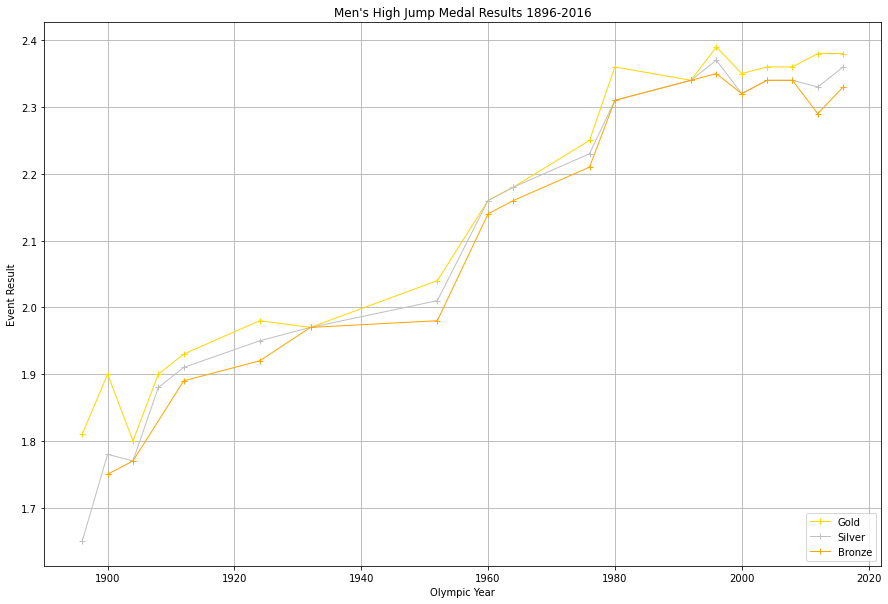

In [40]:
# Plot the results for Mens High Jump
#Group by year and medal and change result into numberic value using lambda
m_highjump_df["Result"] = m_highjump_df["Result"].map(lambda x:float(x))
m_highjump_gb = m_highjump_df.groupby(['Year',"Medal"])["Result"].mean()

#Create dataframe to plot and reset index then create dataframes for each medal
m_highjump_plt_df = pd.DataFrame(m_highjump_gb).reset_index()
hj_gold_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="G",["Year", "Result"]]
hj_silver_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="S",["Year", "Result"]]
hj_bronze_df = m_highjump_plt_df.loc[m_highjump_plt_df["Medal"]=="B",["Year", "Result"]]

#Plot the three medal reults to line graph and save file to output folder
fig= plt.figure(figsize=(15,10))
plt.plot(hj_gold_df["Year"], hj_gold_df["Result"], linewidth=1, marker="+", color="gold", label="Gold")
plt.plot(hj_silver_df["Year"], hj_silver_df["Result"], linewidth=1, marker="+", color="silver", label="Silver")
plt.plot(hj_bronze_df["Year"], hj_bronze_df["Result"], linewidth=1, marker="+", color="orange", label="Bronze")
plt.grid()
plt.legend(loc="lower right")
plt.title("Men's High Jump Medal Results 1896-2016")
plt.xlabel("Olympic Year")
plt.ylabel("Event Result")
plt.savefig("Output/Men's High Jump Medal Results 1896-2016.png")
plt.show()